<a href="https://colab.research.google.com/github/lamtruong2002/baitapAItuan5/blob/main/renal_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c5733b966623300fa4c61aa18afe7179ae1aa6675901f39b0ca5fbc34bec5c68
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


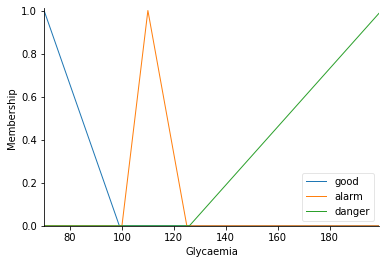

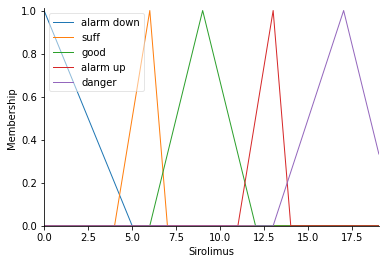

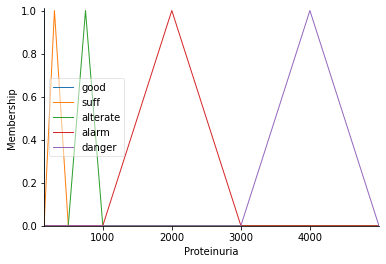

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl
Glycaemia=ctrl.Antecedent(np.arange(70,200,1),'Glycaemia')
Sirolimus=ctrl.Antecedent(np.arange(0,20,1),'Sirolimus')
Proteinuria=ctrl.Consequent(np.arange(150,5000,1),'Proteinuria')

Glycaemia['good']=fuzz.trimf(Glycaemia.universe,[70,70,99])
Glycaemia['alarm']=fuzz.trimf(Glycaemia.universe,[100,110,125])
Glycaemia['danger']=fuzz.trimf(Glycaemia.universe,[126,200,200])

Sirolimus['alarm down']=fuzz.trimf(Sirolimus.universe,[0,0,5])
Sirolimus['suff']=fuzz.trimf(Sirolimus.universe,[4,6,7])
Sirolimus['good']=fuzz.trimf(Sirolimus.universe,[6,9,12])
Sirolimus['alarm up']=fuzz.trimf(Sirolimus.universe,[11,13,14])
Sirolimus['danger']=fuzz.trimf(Sirolimus.universe,[13,17,20])

Proteinuria['good']=fuzz.trimf(Proteinuria.universe,[150,150,150])
Proteinuria['suff']=fuzz.trimf(Proteinuria.universe,[150,300,500])
Proteinuria['alterate']=fuzz.trimf(Proteinuria.universe,[500,750,1000])
Proteinuria['alarm']=fuzz.trimf(Proteinuria.universe,[1000,2000,3000])
Proteinuria['danger']=fuzz.trimf(Proteinuria.universe,[3000,4000,5000])
Glycaemia.view()
Sirolimus.view()
Proteinuria.view()
rule1=ctrl.Rule(Glycaemia['good']&Sirolimus['good'],Proteinuria['good'])
rule2=ctrl.Rule(Glycaemia['danger']&Sirolimus['danger'],Proteinuria['danger'])
rule3=ctrl.Rule(Glycaemia['good']&Sirolimus['suff'],Proteinuria['suff'])
rule4=ctrl.Rule(Glycaemia['alarm']&Sirolimus['alarm_up'],Proteinuria['alarm'])
rule5=ctrl.Rule(Glycaemia['alarm']&Sirolimus['suff'],Proteinuria['alterate'])
rule6=ctrl.Rule(Glycaemia['good']&Sirolimus['alarm_up'],Proteinuria['alterate'])
rule7=ctrl.Rule(Glycaemia['alarm']&Sirolimus['good'],Proteinuria['suff'])
rule8=ctrl.Rule(Glycaemia['good']&Sirolimus['alarm_down'],Proteinuria['suff'])

Proteinuria_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
Proteinuria_1=ctrl.ControlSystemSimulation(Proteinuria_ctrl)
Proteinuria_1.input['Glycaemia']=126
Proteinuria_1.input['Sirolimus']=17
Proteinuria_1.compute()
print(Proteinuria_1.output['Proteinuria'])
Proteinuria.view(sim=Proteinuria_1)

